In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train'
TEST_DIR = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      C:/Users/USER/Desktop/Emotion Recognition/data...     angry
1      C:/Users/USER/Desktop/Emotion Recognition/data...     angry
2      C:/Users/USER/Desktop/Emotion Recognition/data...     angry
3      C:/Users/USER/Desktop/Emotion Recognition/data...     angry
4      C:/Users/USER/Desktop/Emotion Recognition/data...     angry
...                                                  ...       ...
28704  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
28705  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
28706  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
28707  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
28708  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:/Users/USER/Desktop/Emotion Recognition/data...     angry
1     C:/Users/USER/Desktop/Emotion Recognition/data...     angry
2     C:/Users/USER/Desktop/Emotion Recognition/data...     angry
3     C:/Users/USER/Desktop/Emotion Recognition/data...     angry
4     C:/Users/USER/Desktop/Emotion Recognition/data...     angry
...                                                 ...       ...
7173  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
7174  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
7175  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
7176  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise
7177  C:/Users/USER/Desktop/Emotion Recognition/data...  surprise

[7178 rows x 2 columns]
0       C:/Users/USER/Desktop/Emotion Recognition/data...
1       C:/Users/USER/Desktop/Emotion Recognition/data...
2       C:/Users/USER/Desktop/Emotion Recognition/data...
3       C

In [8]:
from tqdm.notebook import tqdm
from keras_preprocessing.image import load_img

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.2401 - loss: 1.8381 - val_accuracy: 0.2471 - val_loss: 1.8151
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 217s 962ms/step - accuracy: 0.2482 - loss: 1.8125 - val_accuracy: 0.2471 - val_loss: 1.7979
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 220s 976ms/step - accuracy: 0.2539 - loss: 1.7843 - val_accuracy: 0.3079 - val_loss: 1.6897
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 211s 934ms/step - accuracy: 0.3120 - loss: 1.7000 - val_accuracy: 0.3619 - val_loss: 1.5954
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 214s 951ms/step - accuracy: 0.3776 - loss: 1.5828 - val_accuracy: 0.4508 - val_loss: 1.4212
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.4213 - loss: 1.4858 - val_accuracy: 0.4685 - val_loss: 1.3627
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 209s 926ms/step - accuracy: 0.4498 - loss: 1.4283 - val_accuracy: 0.4935 - val_loss: 1.3084
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 208s 923ms/step - accuracy: 0.4637

Epoch 99/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 867ms/step - accuracy: 0.7155 - loss: 0.7710 - val_accuracy: 0.6252 - val_loss: 1.0249
Epoch 100/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 196s 871ms/step - accuracy: 0.7171 - loss: 0.7748 - val_accuracy: 0.6258 - val_loss: 1.0254


In [22]:
import matplotlib.pyplot as plt

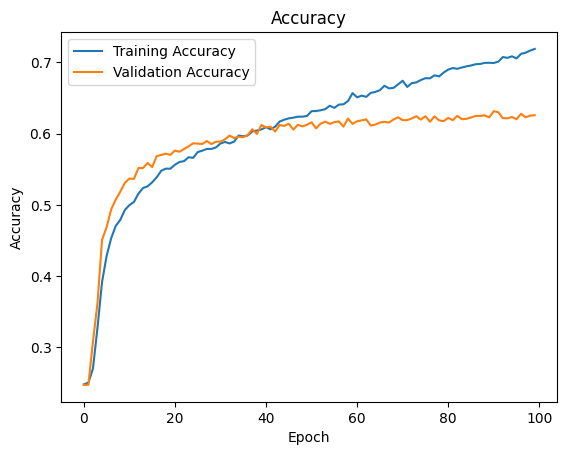

In [23]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

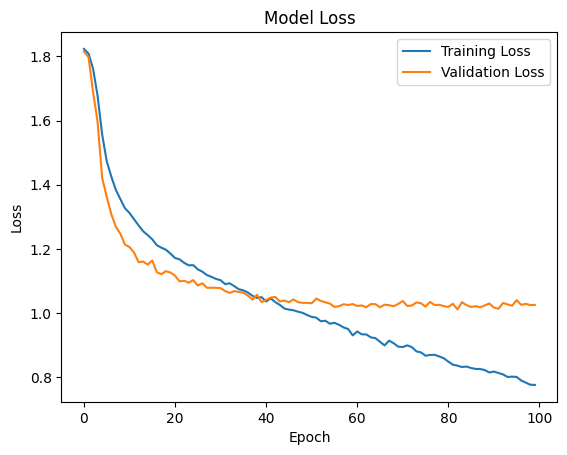

In [24]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Save the model to a file
model_save_path = "../backend/models/face_emotion_model.h5"
model.save(model_save_path)

print(f"Model saved as {model_save_path}")

Model saved as ../backend/models/face_emotion_model.h5


In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','suprise']

In [27]:
def ef(image):
    img = load_img(image,grayscale = True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [28]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/angry/Training_992349.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of angry


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
model prediction is  angry


In [29]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/disgust/Training_5420780.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  disgust


In [30]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/fear/Training_282505.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  fear


In [31]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/happy/Training_87867.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  happy


In [32]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/neutral/Training_964550.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  neutral


In [33]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/sad/Training_423072.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  sad


In [34]:
image = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train/surprise/Training_191269.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  suprise
